# 数据分割及训练

# 决策树

In [37]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pickle
from skimage import img_as_float,io,img_as_ubyte
from skimage.filters import sobel,sobel_h,sobel_v

In [38]:
#载入灰色图片1.1
img=cv.imread('Sandstone_1.tif',0)
ImgShape = img.shape

# blur均值滤波，只用传入图像img 和 kernel的大小(5,5)
img1 = cv.blur(img,(5,5))

#GaussianBlur高斯滤波，传入图像img 和 kernel的大小(5,5)及偏移值
img2=cv.GaussianBlur(img,(5,5),0)

# Sobel综合滤波
img3 = sobel(img)

#Canny滤波
img4 = cv.Canny(img,100,200) #需要提供上下阈值进行滞后阈值分割

'''
#绘图
fg,ax = plt.subplots(1,4,figsize=(12,2))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)

#plt.show()
'''

#将5个图拉直
img = img.reshape(-1,1)
img1 = img1.reshape(-1,1)
img2 = img2.reshape(-1,1)
img3 = img3.reshape(-1,1)
img4 = img4.reshape(-1,1)


#合并5个图
img_total =np.concatenate((img,img1,img2,img3,img4),axis=1)

#载入彩色图片1.2
imga = cv.imread('Sandstone_1_segment.tif',0)
imga = imga.ravel()

#划分训练集
X_train, X_test, y_train, y_test = train_test_split(img_total,imga,test_size=0.25)

#决策树模型拟合
clf1 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)

#封装数据        
with open("clf1", 'wb') as f:
    pickle.dump(clf1, f)

#获得算法的准确率
acc = clf1.score(X_test, y_test)
print("准确率:", acc)


准确率: 0.9617807166164659


# 预测

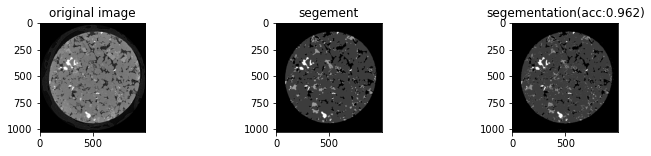

In [39]:
#载入预测图和结果对比图
img_two = cv.imread('Sandstone_2.tif',0)
img_two_result = cv.imread('Sandstone_2_segment.tif',0)
                           
                     
# blur均值滤波，只用传入图像img 和 kernel的大小(5,5)
img_two1 = cv.blur(img_two,(5,5))

#GaussianBlur高斯滤波，传入图像img 和 kernel的大小(5,5)及偏移值
img_two2=cv.GaussianBlur(img_two,(5,5),0)

# Sobel综合滤波
img_two3 = sobel(img_two)

#Canny滤波
img_two4 = cv.Canny(img_two,100,200) #需要提供上下阈值进行滞后阈值分割

#将5个图拉直
img_two = img_two.reshape(-1,1)
img_two1 = img_two1.reshape(-1,1)
img_two2 = img_two2.reshape(-1,1)
img_two3 = img_two3.reshape(-1,1)
img_two4 = img_two4.reshape(-1,1)


img_total2 =np.concatenate((img_two,img_two1,img_two2,img_two3,img_two4),axis=1)

#读取clf模型
with open("clf1", 'rb') as f:
    clf1 = pickle.load(f)

#预测
img_predict = clf1.predict(img_total2)


#绘图
fg,ax = plt.subplots(1,3,figsize=(12,2))

img_two  = img_two.reshape(1024, 996)
img_predict = img_predict.reshape(1024,996)

ax[0].imshow(img_two,cmap='gray')
ax[0].set_title('original image')
ax[2].imshow(img_predict,cmap='gray')
ax[2].set_title(f'segementation(acc:{round(acc,3)})')
ax[1].imshow(img_two_result,cmap='gray')
ax[1].set_title('segement')

plt.show()

# 随机森林

In [40]:
from sklearn.ensemble import RandomForestClassifier

#载入灰色图片1.1
img=cv.imread('Sandstone_1.tif',0)
ImgShape = img.shape

# blur均值滤波，只用传入图像img 和 kernel的大小(5,5)
img1 = cv.blur(img,(5,5))

#GaussianBlur高斯滤波，传入图像img 和 kernel的大小(5,5)及偏移值
img2=cv.GaussianBlur(img,(5,5),0)

# Sobel综合滤波
img3 = sobel(img)

#Canny滤波
img4 = cv.Canny(img,100,200) #需要提供上下阈值进行滞后阈值分割

'''
#绘图
fg,ax = plt.subplots(1,4,figsize=(12,2))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)

#plt.show()
'''

#将5个图拉直
img = img.reshape(-1,1)
img1 = img1.reshape(-1,1)
img2 = img2.reshape(-1,1)
img3 = img3.reshape(-1,1)
img4 = img4.reshape(-1,1)


#合并5个图
img_total =np.concatenate((img,img1,img2,img3,img4),axis=1)

#载入彩色图片1.2
imga = cv.imread('Sandstone_1_segment.tif',0)
imga = imga.ravel()

#划分训练集
X_train, X_test, y_train, y_test = train_test_split(img_total,imga,test_size=0.25)

#随机森林模型拟合
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#封装数据        
with open("clf", 'wb') as f:
    pickle.dump(clf, f)

#获得算法的准确率
acc = clf.score(X_test, y_test)
print("准确率:", acc)


准确率: 0.9711972891566265


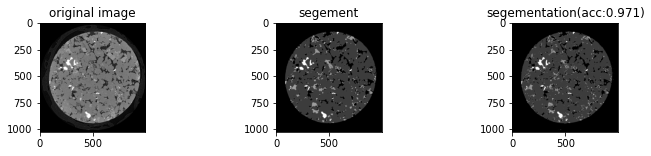

In [41]:
#载入预测图和结果对比图
img_two = cv.imread('Sandstone_2.tif',0)
img_two_result = cv.imread('Sandstone_2_segment.tif',0)
                           
                     
# blur均值滤波，只用传入图像img 和 kernel的大小(5,5)
img_two1 = cv.blur(img_two,(5,5))

#GaussianBlur高斯滤波，传入图像img 和 kernel的大小(5,5)及偏移值
img_two2=cv.GaussianBlur(img_two,(5,5),0)

# Sobel综合滤波
img_two3 = sobel(img_two)

#Canny滤波
img_two4 = cv.Canny(img_two,100,200) #需要提供上下阈值进行滞后阈值分割

#将5个图拉直
img_two = img_two.reshape(-1,1)
img_two1 = img_two1.reshape(-1,1)
img_two2 = img_two2.reshape(-1,1)
img_two3 = img_two3.reshape(-1,1)
img_two4 = img_two4.reshape(-1,1)


img_total2 =np.concatenate((img_two,img_two1,img_two2,img_two3,img_two4),axis=1)

#读取clf模型
with open("clf", 'rb') as f:
    clf = pickle.load(f)

#预测
img_predict = clf.predict(img_total2)


#绘图
fg,ax = plt.subplots(1,3,figsize=(12,2))

img_two  = img_two.reshape(1024, 996)
img_predict = img_predict.reshape(1024,996)

ax[0].imshow(img_two,cmap='gray')
ax[0].set_title('original image')
ax[2].imshow(img_predict,cmap='gray')
ax[2].set_title(f'segementation(acc:{round(acc,3)})')
ax[1].imshow(img_two_result,cmap='gray')
ax[1].set_title('segement')

plt.show()

In [42]:
#保存成pdf格式
fg.savefig('predict.pdf')